<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/CNN/CIFAR10/CNN_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings as wg
wg.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [6]:
x_train.shape # contains 3 color chanels, RGB

(50000, 32, 32, 3)

In [7]:
x_train[0].max()

255

**We need to scale our data**

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

**Need to do the one hot endoing of the target column, As the ML model might consider it continuous variable**

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

# Covolutional Layer
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (32,32,3), activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))


# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (32,32,3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
model.fit(x_train, y_cat_train, epochs=15,
          validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 38s 4ms/step - loss: 1.4899 - accuracy: 0.4609 - val_loss: 1.2433 - val_accuracy: 0.5571
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1395 - accuracy: 0.6001 - val_loss: 1.1396 - val_accuracy: 0.6033
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9915 - accuracy: 0.6534 - val_loss: 1.0530 - val_accuracy: 0.6311
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8798 - accuracy: 0.6937 - val_loss: 0.9824 - val_accuracy: 0.6625
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7856 - accuracy: 0.7265 - val_loss: 0.9492 - val_accuracy: 0.6748
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7083 - accuracy: 0.7537 - val_loss: 0.9513 - val_accuracy: 0.6780
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7784 - val_loss: 0.9591 - val_accuracy

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.489853,0.46088,1.243317,0.5571
1,1.139469,0.60012,1.139553,0.6033
2,0.991457,0.65344,1.053031,0.6311
3,0.879813,0.69372,0.982442,0.6625
4,0.785568,0.72654,0.949209,0.6748
5,0.708335,0.75368,0.951286,0.6780
6,0.636560,0.77838,0.959108,0.6842


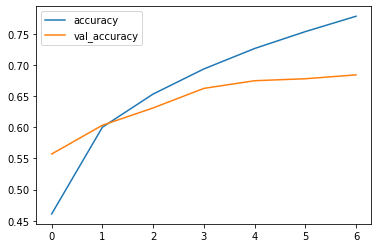

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

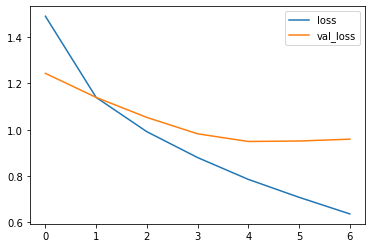

In [22]:
metrics[['loss', 'val_loss']].plot()

In [23]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9591081142425537, 0.6841999888420105]

In [1]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predictions = model.predict_classes(x_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.89      0.71      0.79      1000
           2       0.55      0.63      0.59      1000
           3       0.49      0.53      0.51      1000
           4       0.67      0.60      0.63      1000
           5       0.59      0.54      0.56      1000
           6       0.73      0.80      0.76      1000
           7       0.70      0.77      0.73      1000
           8       0.84      0.71      0.77      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



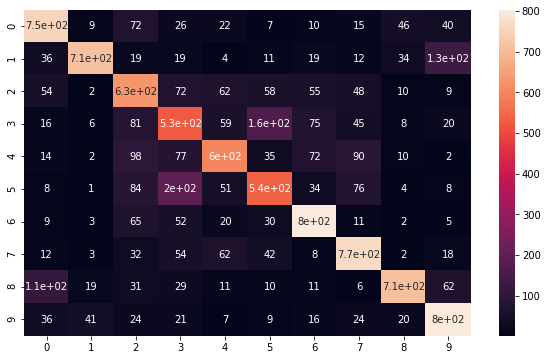

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot= True)

In [30]:
my_image = x_test[0]

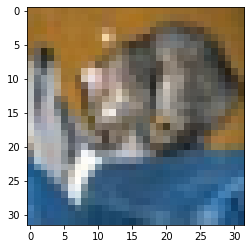

In [31]:
plt.imshow(my_image)

In [32]:
y_test[0]

array([3], dtype=uint8)

In [33]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([3])